In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <p style="background-color:#1E1A1A;font-family:newtimeroman;color:#E20D0D;font-size:150%;text-align:center;border-radius:20px 60px;">NETFLIX</p>
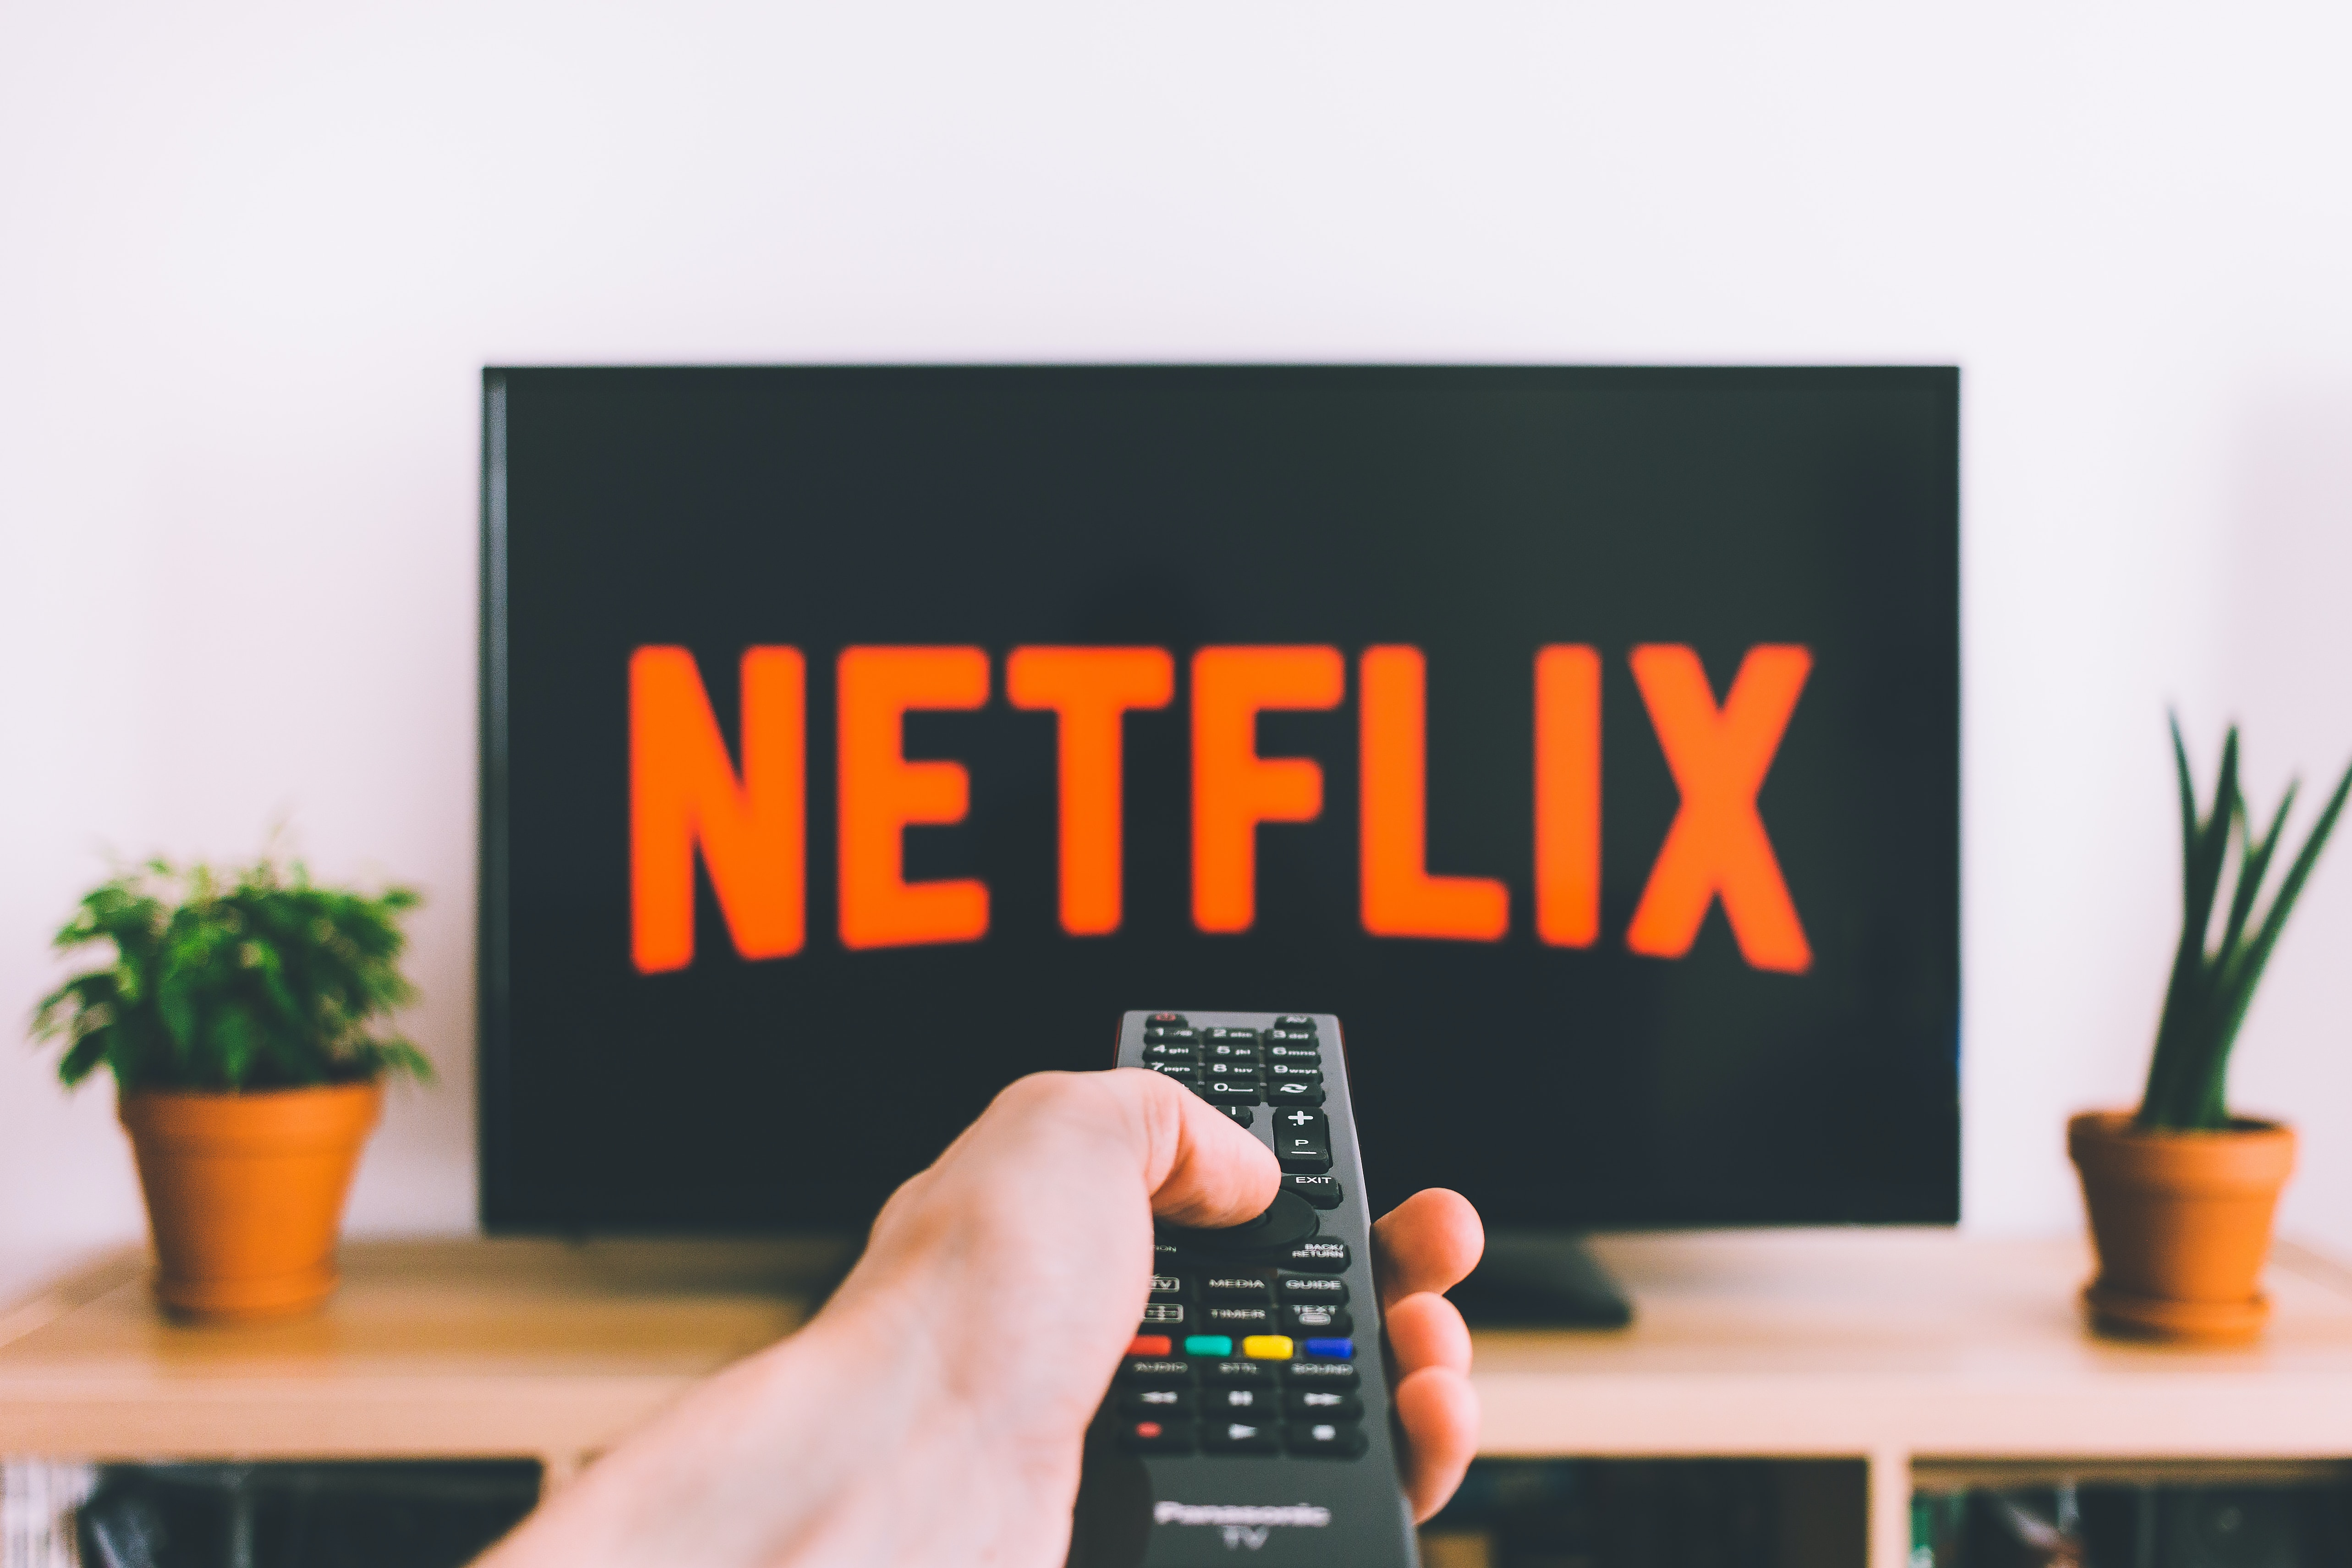
 <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#E20D0D;font-family:newtimeroman;color:#1E1A1A;font-size:150%;text-align:center;border-radius:20px 60px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA VISUALIZATION](#3)<br>
    * [  3.1. MOVIES & TV SHOWS](#3.1)<br>
    * [  3.2. RATING of MOVIES](#3.2)<br>
    * [  3.3. RELATION b/w TYPE & RATING](#3.3)<br>
    * [  3.4. TYPE & RELEASE YEAR](#3.4)<br>
    
    
* [4.EXPLORATORY DATA ANALYSIS ](#4)
    
    * [  4.5. 10 MOST OLD MOVIES ON NETFLIX](#4.5)<br>
    * [  4.6  10 MOST NEW MOVIES ON NETFLIX](#4.6)<br>
    * [  4.7  DURATION ANALYSIS OF MOVIES & TV SHOWS](#4.7)<br>
    
    
* [5.WORDCLOUD](#5)
     
     * [  5.1. COUNTRY](#5.1)<br>
     * [  5.2. DIRECTORS](#5.2)<br>
     * [  5.3. CATEGORIES](#5.3)<br>
  
    
* [6.MOVIE RECOMMENDER SYSTEM](#6)<br>
    
     * [ 6.1. FEATURE ENGINEERING](#6.1)<br>
     * [ 6.2. OUTLIER DETECTION](#6.2)<br>
     * [ 6.3. DATA PREPROCESSING](#6.3)<br>
          * [ 6.3.1. CLEANING TEXT](#6.3.1)<br>
          * [ 6.3.2. TOKENIZATION](#6.3.2)<br>
          * [ 6.3.3. REMOVING STOPWORDS](#6.3.3)<br>
          * [ 6.3.4. LEMMATIZATION](#6.3.4)<br>
     * [  6.4. VECTORIZE](#6.4)<br>
     * [  6.5. RECOMMENDER SYSTEM](#6.5)<br>
    
    
* [7. END](#7)
    
    

<a id="1"></a>
# <p style="background-color:#1E1A1A;font-family:newtimeroman;color:#E20D0D;font-size:150%;text-align:center;border-radius:20px 60px;">IMPORTING LIBRARIES</p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize,sent_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

<a id="2"></a>
# <p style="background-color:#1E1A1A;font-family:newtimeroman;color:#E20D0D;font-size:150%;text-align:center;border-radius:20px 60px;">LOADING DATA</p>

<p style="font-family: Arials, sans-serif; font-size: 14px; color: rgba(0,0,0,.7)"><strong>FEATURES:</strong></p>

<ol style="font-family: Arials, sans-serif; font-size: 14px; line-height:1.5; color: rgba(0,0,0,.7)">
<li><strong>SHOW-ID</strong> - Unique id of each show (not much of a use for us in this notebook)</li>
<p></p>    
<li><strong>TYPE</strong> - The category of a show, can be either a Movie or a TV Show</li>
<p></p>
<li><strong>TITLE</strong> -  Name of the show</li>
<p></p>    
<li><strong>DIRECTOR</strong> -  Name of the director(s) of the show</li>
<p></p>
<li><strong>CAST</strong> -  Name of the Actors</li>
<p></p>    
<li><strong>COUNTRY</strong> -  Country where the movie / show was produced</li>
<p></p>
<li><strong>DATE ADDED</strong> -  Date when the show was added on Netflix</li>
<p></p>
<li><strong>RATING</strong> -  Show rating on netflix</li>
<p></p>    
<li><strong>RELEASE YEAR</strong> -  Release year of the show</li>
<p></p>
<li><strong>DURATION</strong> -  Time duration of the show</li>
<p></p>    
<li><strong>LISTED IN</strong> -  Genre of the show </li>
<p></p> 
 
 <li><strong>DESCRIPTION</strong> - Desription about the show</li>
</ol>

In [ ]:
netflixData=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
netflixData.head(2)

**Shape of dataset**

In [ ]:
netflixData.shape

In [ ]:
netflixData.index

**print the name of columns**

In [ ]:
netflixData.columns

**Data Types**

In [ ]:
netflixData.dtypes

**Check for Null Values**

In [ ]:
netflixData.isnull().sum()

In [ ]:
netflixData.drop("show_id",axis="columns",inplace=True)

In [ ]:
color = ['grey','grey','grey','grey','grey','grey','grey','grey','red','red','red','red']
missingno.bar(netflixData,fontsize =16, color = color, sort = 'descending', figsize = (12,6))
plt.title("VISUALIZATION OF MISSING VAUES",fontsize=25)
plt.show()

### Most of the Values are Missing From Director column and some of in cast,country and Date column

### Let's impute the missing values:

In [ ]:
c=netflixData["country"].mode()[0]
print(c)
d=netflixData["date_added"].mode()[0]
print(d)
r=netflixData["rating"].mode()[0]
print(r)

In [ ]:
# handling missing values
netflixData['director'] = netflixData['director'].fillna('')
netflixData['country'] = netflixData['country'].fillna(netflixData['country'].mode()[0])
netflixData['cast'] = netflixData['cast'].fillna('')
netflixData['date_added'] = netflixData['date_added'].fillna(netflixData['date_added'].mode()[0])
netflixData['rating'] = netflixData['rating'].fillna(netflixData['rating'].mode()[0])
print('count of values')
print(netflixData.isna().sum())

**check for Duplicate values**

In [ ]:
netflixData.duplicated().sum()

**No duplicate values present**

<a id="3"></a>
# <p style="background-color:#1E1A1A;font-family:newtimeroman;color:#E20D0D;font-size:150%;text-align:center;border-radius:20px 60px;">DATA VISUALIZATION</p>

<a id="3.1"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">TYPE:MOVIE & TV SHOWS</p>


In [ ]:
netflixData.type.unique()

In [ ]:
Palette = ["#b93c28","#4ea392"]
sns.set_style("darkgrid")
sns.set_palette(Palette) 
plot = sns.countplot(x="type",data=netflixData) 

In [ ]:
netflix_TVshows=netflixData[netflixData['type']=='TV Show']
print(netflix_TVshows.head(2))

In [ ]:
netflix_movies=netflixData[netflixData['type']=='Movie']
print(netflix_movies.head(2))

<a id="3.2"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">TYPE:RATING OF MOVIES</p>


In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only. 

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".


<a id="3.3"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">TYPE:RELATION  B/W  TYPE & RATING</p>


In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflixData)
plt.title('Relation between Type and Rating')
plt.xticks(rotation="vertical",size=10)
plt.show()

<a id="3.4"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">TYPE:TOTALL NUMBER OF MOVIES & TV SHOWS BASED ON RELEASE YEAR</p>


In [ ]:
plt.figure(figsize=(12,6))  #Counting the total number of movie & TV Shows based on release year.
sns.set_style('darkgrid')
sns.countplot(x='release_year',data=netflixData,order=netflixData['release_year'].value_counts(ascending=False).index[:20])

Uploading of movies and TV Shows released every year has been increasing over the years.

<a id="4"></a>
# <p style="background-color:#1E1A1A;font-family:newtimeroman;color:#E20D0D;font-size:150%;text-align:center;border-radius:20px 60px;">EXPLORATORY DATA ANALYSIS</p>

<a id="4.1"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">COUNTRY WISE ANALYSIS OF AVAILABILITY OF CONTENT IN MOVIES</p>


In [ ]:
print('Top 10 movie creators:')
print(netflixData.groupby('type').country.value_counts()['Movie'][:10])   #Top 10 movies creating countries(what is available on Netflix)
print('\n')

#Visualisation (Top 10 content creating countries())
m=netflixData[netflixData["type"]=="Movie"]
movies=m["country"].value_counts().reset_index()[0:10]
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF MOVIES",fontsize=25)
ax=sns.barplot(x=movies["index"],y=movies["country"])

**Top 5 countries when it comes to availability and creation of movies:- USA, India, UK, Cananda, Spain**


<a id="4.2"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">COUNTRY WISE ANALYSIS OF AVAILABILITY OF CONTENT IN TV SHOWS</p>


In [ ]:
print('Top 10 TV Show creators:')
print(netflixData.groupby('type').country.value_counts()['TV Show'][:10])  #Top 10 TV Shows creating countries

#Visualisation (Top 10 content creating countries())
tv=netflixData[netflixData["type"]=="TV Show"]
movies=tv["country"].value_counts().reset_index()[0:10]
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF MOVIES",fontsize=25)
ax=sns.barplot(x=movies["index"],y=movies["country"])

**Top 5 countries when it comes to availability and creation of TV Shows:- USA, UK, Japan, South Korea, India**

<a id="4.3"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">GENRE WISE ANALYSIS OF CONTENT</p>

In [ ]:
print(netflixData['listed_in'].value_counts()[:10])  #Top 10 genres of all types of content (TV Shows & Movies) and the visual representation.

plt.figure(figsize=(16,8))  
sns.countplot(x=netflixData['listed_in'],order=netflixData['listed_in'].value_counts().index[:10])
plt.xticks(rotation="vertical",size=20)

<a id="4.4"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">RELEASE DATA/YEAR ANALYSIS (TYPE OF CONTENT AVAILABLE,OLD TO NEW</p>


In [ ]:
date=netflixData["release_year"].sort_values(ascending=True)
date

In [ ]:
netflixData["release_year"].head(2)

In [ ]:
#Defining a function that categorises content on the basis of release_year

def release(release_date):
    if 1925<release_date<=1960:
        return "1925-1960\nExtremely old"
    elif 1960<release_date<=1990:
        return '1960-1990\n Very old'
    elif 1990<release_date<=2000:
        return '1990-2000\nOld'
    elif 2000<release_date<=2015:
        return '2000-2015\nEarly21st century'
    elif 2015<release_date<=2021:
        return '2015-2021\nNew'
    else:
        return None
netflixData['Movie_release_type']=netflixData['release_year'].apply(release)

In [ ]:
netflixData.head(3)

In [ ]:
print(netflixData.groupby('Movie_release_type').type.value_counts())
sns.countplot(x=netflixData['Movie_release_type'],hue=netflixData["type"],palette=['#1D7563',"#9A0F1C"])
plt.xticks(rotation="vertical",size=10)


Most of the content available on  period 2000-2021.

If we see the graph from close, it can be seen that the concept of TV Shows was not prominent before 2000. It started gaining some popularity in the first decade of 21st century.


<a id="4.5"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">10 MOST OLD MOVIES ON NETFLIX</p>



In [ ]:
a=[]
b=[]
df=netflixData['release_year'].sort_values(ascending=True)[:10].to_frame()
print(df)
for i in df.index:
    a.append(netflixData['release_year'].iloc[i])   #Using iloc to obtain corresponding values of a column using the value's index.
    b.append(netflixData['title'].iloc[i])
df2=pd.DataFrame(data={'Release year':a,'Title':b},index=[1,2,3,4,5,6,7,8,9,10])   #Creating a dataframe from the values obtained.
df2

<a id="4.6"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">10 MOST NEW MOVIES ON NETFLIX</p>

In [ ]:
l=[]
m=[]
df=netflixData['release_year'].sort_values(ascending=False)[:10].to_frame()
for i in df.index:
    l.append(netflixData['release_year'].iloc[i])   #Using iloc to obtain corresponding values of a column using the value's index.
    m.append(netflixData['title'].iloc[i])
df3=pd.DataFrame(data={'Release year':l,'Title':m},index=[1,2,3,4,5,6,7,8,9,10])
df3

<a id="4.7"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">DURATION ANALYSID OF MOVIES & TV SHOWS</p>


In [ ]:
netflixData.groupby('type').duration.value_counts()

In [ ]:
d=netflixData["duration"]
d

In [ ]:
e=netflixData[netflixData['type']=="Movie"]
e["duration"].head(3)

In [ ]:
t=netflixData[netflixData['type']=="TV Show"]
t["duration"][t["duration"]=="1 Season"].value_counts()

In [ ]:
l=[]
m=[]

for i in netflixData['duration']:
    i=str(i)
    if i[3:6]=='min':
        l.append(int(i[0:2]))
    elif i[4:7]=='min':
        l.append(int(i[0:3]))
    elif i[2:9]=="Seasons":
        m.append(int(i[0:2]))
    elif i[2:8]=="Season":
        m.append(int(i[0:2]))
    elif i[3:10]=='Seasons':
        m.append(int(i[0:3]))

#Visualisation (duration of movies in minutes)     
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.distplot(x=l)
plt.xlabel('time in minutes')
plt.ylabel('% of netflix movies')
plt.title('Duration distribution of movies on netflix (in min)')

#Visualisation (number of seasons)
plt.figure(figsize=(12,6))
sns.countplot(x=m)
plt.xlabel('No. of seasons')
plt.ylabel('count of netflix TV Shows')
plt.title('Duration distribution of TV Shows on netflix (no. of seasons)')

Duration of most of the movies is less than 100 minutes (somewhere between 90-92 minutes) whereas most of the TV Shows have 1 seasons.

<a id="4.8"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">DATE ADDED</p>


In [ ]:
import datetime as dt
netflixData['date_added']=pd.to_datetime(netflixData['date_added'])
netflixData['Month']=netflixData['date_added'].dt.month
netflixData.head(2)

In [ ]:
netflixData['Month'].value_counts().plot(kind='bar',color='orange')
plt.ylabel('Count')
plt.xlabel('Month(number)')
plt.title('Movie release month on Netflix')

Most number of movies were added in Netflix on july.

<a id="5"></a>
# <p style="background-color:#1E1A1A;font-family:newtimeroman;color:#E20D0D;font-size:150%;text-align:center;border-radius:20px 60px;">WORDCLOUD</p>

In [ ]:
# in this section using this library ,from wordcloud import WordCloud

<a id="5.1"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">COUNTRY</p>


In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(netflixData.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

<a id="5.2"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">DIRECTORS</p>


In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(netflixData.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

<a id="5.3"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">CATEGORIES</p>


In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(netflixData.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

<a id="6"></a>
# <p style="background-color:#1E1A1A;font-family:newtimeroman;color:#E20D0D;font-size:150%;text-align:center;border-radius:20px 60px;">MOVIE RECOMMENDER SYSTEM</p>

<a id="6.1"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">FEATURE ENGINEERING</p>


For the purpose of data exploration, I am creating new features 

* No_of_Characters: Number of characters in the combined_features
* No_of_Words: Number of words in the combined_features
* No_of_sentence: Number of sentences in the combined_features  

In [ ]:
netflixData["description"].head(5)

In [ ]:
netflixData["listed_in"]

In [ ]:
#A function called combined_features is created which is a column that is a merge of the columns description,director,cast and listed_in.

def combined_features(row):
    return str(row['description'])+' '+str(row['listed_in'])


netflixData['combined_features']=netflixData.apply(combined_features,axis=1) #Adding the combined_features column in the original dataframe.

netflixData['combined_features'].fillna('')   #Null values are replaced with the an empty string

netflixData['combined_features'][1]


In [ ]:
#Using this library,
#import nltk
#from nltk import word_tokenize,sent_tokenize

In [ ]:
#Adding a column of numbers of characters,words and sentences in each msg
netflixData["No_of_Characters"] = netflixData["combined_features"].apply(len)
netflixData["No_of_Words"]=netflixData.apply(lambda row: nltk.word_tokenize(row["combined_features"]), axis=1).apply(len)
netflixData["No_of_sentence"]=netflixData.apply(lambda row: nltk.sent_tokenize(row["combined_features"]), axis=1).apply(len)

#PS. At this step, I tokenised the words and sentences and used the length of the same. 
#More on Tokenizing later in the notebook.

<a id="6.2"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">OUTLIER DETECTION</p>


In [ ]:
netflixData.describe().T

In [ ]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=netflixData,hue="type",palette= ["#b93c28","#4ea392"])
plt.show(fg)

THERE IS NO OUTLIER


<a id="6.3"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:150%;border-radius:20px 60px;">DATA PREPROCESSING</p>


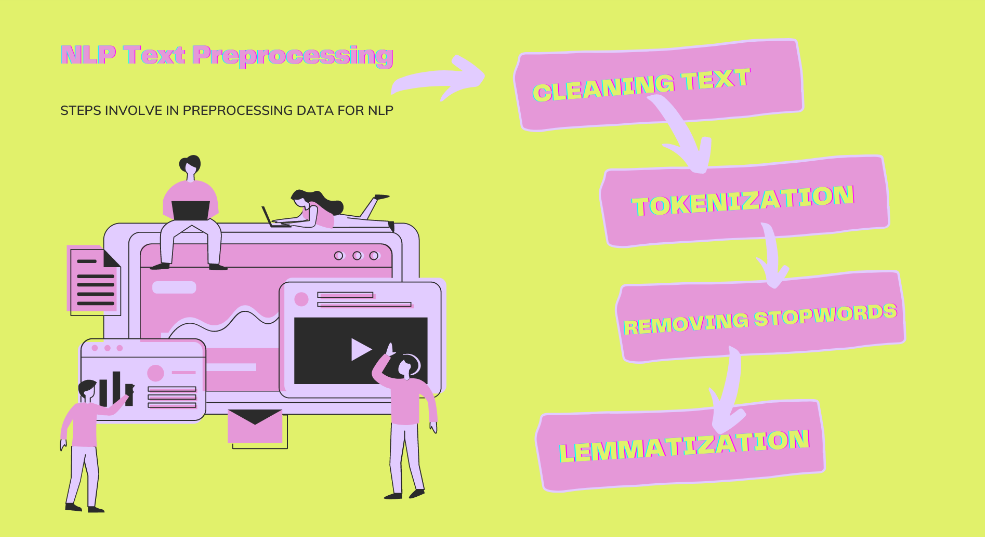

<a id="6.3.1"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">CLEANING TEXT</p>


The data cleaning process NLP is crucial. The computer doesn’t understand the text. for the computer, it is just a cluster of symbols. To further process the data we need to make the data cleaner. 

* In the first step we extract only the alphabetic characters by this we are removing punctuation and numbers. 
* In the next step, we are converting all the characters into lowercase. 

This text will be then used in further procrssing

In [ ]:
netflixData['combined_features'].head(5)

In [ ]:
# used this library,import re

In [ ]:
# Defining a function to clean up the combined feature
def Clean(Text):
    s = re.sub('[^a-zA-Z]', ' ', Text) #Replacing all non-alphabetic characters with a space#^means not
    #re :regular expression(library)
    s = s.lower() #converting to lowecase
    s = s.split()
    s = ' '.join(s)
    return s

netflixData["Clean_Text"] = netflixData["combined_features"].apply(Clean)
#Lets have a look at a sample of texts after cleaning
print("\033[1m\u001b[45;1m The First 5 Texts after cleaning:\033[0m",*netflixData["Clean_Text"][:5],sep="\n")

<a id="6.3.2"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">TOKENIZATION</p>


**Tokenization** is breaking complex data into smaller units called tokens. It can be done by splitting paragraphs into sentences and sentences into words. 
I am splitting the Clean_Text into words at this step.

In [ ]:
netflixData["Tokenize_Text"]=netflixData.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m",*netflixData["Tokenize_Text"][:5], sep = "\n")

<a id="6.3.3"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">REMOVING STOPWORDS</p>


**Stopwords** are frequently occurring words(*such as few, is, an, etc*). These words hold meaning in sentence structure, but do not contribute much to language processing in NLP. For the purpose of removing redundancy in our processing, I am removing those. NLTK library has a set of default stopwords that we will be removing. 

In [ ]:
#used this library,from nltk.corpus import stopwords


In [ ]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

netflixData["Nostopword_Text"] = netflixData["Tokenize_Text"].apply(remove_stopwords)

print("\033[1m\u001b[45;1m The First 5 Texts after removing the stopwords:\033[0m",*netflixData["Nostopword_Text"][:5], sep = "\n")

<a id="6.3.4"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:80%;border-radius:20px 60px;">LEMMATIZATION</p>


**Stemming** is the process of getting the root form of a word. Stem or root is the part to which inflectional affixes are added. The stem of a word is created by removing the prefix or suffix of a word. It goes back to the etymology of the word. Languages evolve over time. Many different languages branch into each other; for example, English is a derivative of Latin. Thus, stemming a word takes it back to the root word. 

**lemmatization** also converts a word to its root form. However, the difference is that lemmatization ensures that the root word belongs to the language one is dealing with, in our case it is English. If we use lemmatization the output would be in English. 

In [ ]:
# using these libraries,
#import nltk
#from nltk import word_tokenize,sent_tokenize
#from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
#from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]#pos means partsof speech ,here v is verb
    return lemmas

netflixData["Lemmatized_Text"] = netflixData["Nostopword_Text"].apply(lemmatize_word)
print("\033[1m\u001b[45;1m The First 5 Texts after lemitization:\033[0m",*netflixData["Lemmatized_Text"][:5], sep = "\n")

<a id="6.4"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:100%;border-radius:20px 60px;">VECTORIZE</p>


**TF-IDF** in NLP stands for Term Frequency – Inverse document frequency. In NLP cleaned data needs to be converted into a numerical format where each word is represented by a matrix. This is also known as word embedding or Word vectorization.

Term Frequency (TF) = (Frequency of a term in the document)/(Total number of terms in documents)
Inverse Document Frequency(IDF) = log( (total number of documents)/(number of documents with term t))
I will be using TfidfVectorizer() to vectorize the preprocessed data. 

**Steps in the Vectorizing:**
* Creating a corpus of lemmatized text
* Converting the corpus in vector form

 


In [ ]:
#Creating a corpus of text feature to encode further into vectorized form
corpus= []
for i in netflixData["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)
    
corpus[:5]
print("\033[1m\u001b[45;1m The First 5 lines in corpus :\033[0m",*corpus[:5], sep = "\n")

In [ ]:
#using this library,
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf=TfidfVectorizer()

In [ ]:
#Changing text data into numbers.
tfidf=TfidfVectorizer()
tfidf_matrix=tfidf.fit_transform(corpus)
tfidf_matrix.shape


<a id="6.5"></a>
# <p style="background-color:#F6A740;font-family:newtimeroman;color:#2108A1;text-align:center;font-size:100%;border-radius:20px 60px;">RECOMMENDER SYSTEM</p>


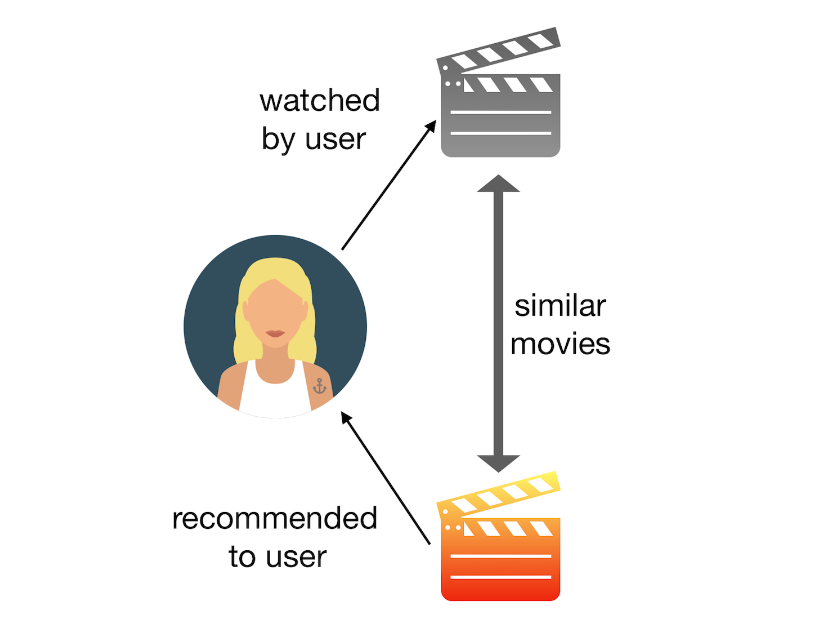

In [ ]:
#using this library,
#from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_sim=cosine_similarity(tfidf_matrix,tfidf_matrix)
cosine_sim

In [ ]:
indices=pd.Series(netflixData.index,index=netflixData["title"])
indices

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    index = indices[title]

    # Getting the similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sorting the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Getting the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Getting the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflixData['title'].iloc[movie_indices]

In [ ]:
#Making some predictions to test our model.

get_recommendations('3 Idiots')   

In [ ]:
get_recommendations('Sherlock Holmes')


**<span style="color:#2108A1;"> If you liked this Notebook, please do upvote.</span>**

**<span style="color:#2108A1;"> If you have any suggestions or questions, feel free to comment!</span>**

**<span style="color:#2108A1;"> Best Wishes!</span>**

<a id="7"></a>
# <p style="background-color:#1E1A1A;font-family:newtimeroman;color:#E20D0D;font-size:150%;text-align:center;border-radius:20px 60px;">END</p>

